# Topic modelling

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Topic modeling

- distribution on words for each topic
- distribution on topics for each document
- assigns each works in document to topic

## Latent Dirichlet Allocation

$\beta_k$ = distribution on words for topic k
- every distribution contains all words and assign a probability to it

$\theta_d$ = distribution on topics for document d
- every document contains all topics and assign a probability to it

### Generative process

#### Generate each word distribution (topic)

$\beta_k \sim Dirichlet(\gamma)$
- for $k = 1,...,K$

#### Generate topic distribution for each document

$\theta_d \sim Dirichlet(\alpha)$
- for $d = 1,...,D$

#### for nth word in dth document

$c_{dn} \sim Discrete(\theta_d)$
- this is the topic allocation to this specific word

$x_{cn} \sim Discrete(\beta_{c_{dn}})$
- this is the word generated from the topic distribtuion $\beta_{c_{dn}}$

## Dirichlet distribution

- continous distribution on vectors
- with $\beta_k$ a probability vector
- with $\gamma$ a positive parameter vector
- parameter V is size of $\beta_k$ and $\gamma$ so its discrete in a way

$p(\beta_k|\gamma) = \frac{\Gamma(\sum_v\gamma_v}{\prod_{v=1}^V\Gamma(\gamma_v)}\prod_{v=1}^V{\beta^{\gamma_v}_{k,v}}^{-1}$
- with $\gamma$ constant
- as $\gamma \to \infty$, the distribution becomes uniform
- as $\gamma \to 0$, the distribution puts all mass on 1 value


### Link to matrix factorization

$P(x_{dn}=i|\beta, \theta_d) = \sum_{k=1}^KP(x_{dn}=i, c_{dn}=k |\beta, \theta_d)$

$= \sum_{k=1}^K\underbrace{P(x_{dn}=i|\beta, c_{dn}=k)}_{\beta_{ki}}\underbrace{P(c_{dn}=k|\theta_d)}_{\theta_{dk}}$

$= \sum_{k=1}^K\beta_{ki}\theta_{dk}$

$= (B\Theta)_{id}$
- we can see this a 2 non-negative matrices being multiplied

## Matrix Factorization

Data matrix X

$X_{ij} \ge 0$

factorised matrices W and H

$W_{ik} \ge 0$

$H_{kj} \ge 0$

$X_{ij} \approx \sum_{k} W_{ik}H_{kj}$

#### Data

- we could use a word on each row and frequency of word for document on each column
- each row is a feature
- each coloumn is a scenario
- eg. each row is a pixel in an image, and coloumn is a different image



## Objective functions

#### Squared error

$||X - WH||^2 = \sum_i\sum_j(X_{ij}-(WH)_{ij})^2$

#### Divergence objective

$D(X||WH) = -\sum_i\sum_j[X_{ij}\ln(WH)_{ij} - (WH)_{ij}]$

## Multiplicative updates

### Squared error

$\min \sum_{ij}(X_{ij}-(WH)_{ij})^2$

Randomly initialize W and H

$H_{kj} \gets H_{kj}\frac{(W^TX)_{kj}}{(W^TWH)_{kj}}$
- for all H elements

$W_{ik} \gets W_{ik}\frac{(XH^T)_{ik}}{(WHH^T)_{ik}}$
- for all W elements

until change in squared error is small

### Divergence objective

$\min \sum_{ij}[X_{ij}\ln\frac{1}{(WH)_{ij}} + (WH)_{ij}]$

Randomly initialize W and H

$H_{kj} \gets H_{kj}\frac{\sum_iW_{ik}X_{ij}/(WH)_{ij}}{\sum_iW_{ik}}$
- for all H elements

$W_{ik} \gets W_{ik}\frac{\sum_iH_{kj}X_{ij}/(WH)_{ij}}{\sum_iH_{kj}}$
- for all W elements

until change in $D(X||WH)$ is small



/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


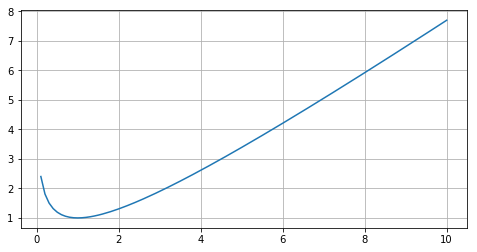

In [2]:
x = np.linspace(-10, 10, 201)

def f(x):
    return -(1*np.log(x)-x)

y = f(x)

fig, ax = plt.subplots(1, figsize=(8,4))

ax.plot(x,y)

ax.grid(True)
plt.show()
